In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('train_twt.csv')
data2 = pd.read_csv('test_twt.csv')
data2 = data2.drop(['Unnamed: 0', 'screen_name'], axis = 1)
data = data.drop(['Unnamed: 0', 'screen_name'], axis = 1)
tweets = pd.concat([data, data2]).reset_index()
tweets

,index,text,account.type,class_type
0,0,YEA now that note GOOD,bot,others
1,1,Listen to This Charming Man by The Smiths htt...,human,human
2,2,wish i can i would be seeing other hoes on the...,bot,others
3,3,The decade in the significantly easier schedul...,bot,others
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn
...,...,...,...,...
23265,2553,“The best kept secret,bot,others
23266,2554,Love the Choose your own adventure style of th...,human,human
23267,2555,JOIN OUR TEAM: Sneezing,bot,gpt2
23268,2556,These deeply discounted 256GB SanDisk flash dr...,human,human


In [2]:
import re
tweets['hashtags'] =''
tweets['mentions'] =''
for word in range(len(tweets)):
    tweet = tweets["text"][word]
    tweet.replace('\n', " ")
    word_list = tweet.split(' ')
    regex = "#(\w+)"
    regex2 = "@(\w+)"
    hashtag_list = re.findall(regex, tweet)
    mentions_list = re.findall(regex2, tweet)
    tweets["hashtags"][word] = hashtag_list
    tweets["mentions"][word] = mentions_list

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/1484472733.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["hashtags"][word] = hashtag_list
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/1484472733.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["mentions"][word] = mentions_list


In [3]:
tweets

,index,text,account.type,class_type,hashtags,mentions
0,0,YEA now that note GOOD,bot,others,[],[]
1,1,Listen to This Charming Man by The Smiths htt...,human,human,[],[]
2,2,wish i can i would be seeing other hoes on the...,bot,others,[],[]
3,3,The decade in the significantly easier schedul...,bot,others,[],[]
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,[],[]
...,...,...,...,...,...,...
23265,2553,“The best kept secret,bot,others,[],[]
23266,2554,Love the Choose your own adventure style of th...,human,human,[],[]
23267,2555,JOIN OUR TEAM: Sneezing,bot,gpt2,[],[]
23268,2556,These deeply discounted 256GB SanDisk flash dr...,human,human,[],[pcworld]


In [4]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
tweets['no_of_grammar_errors'] = ''
for word in range(len(tweets)):
    cap = tweets["text"][word]
    word_list = cap.split(' ')
    tweets['no_of_grammar_errors'][word] = len(tool.check(cap))
tweets

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/753932557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['no_of_grammar_errors'][word] = len(tool.check(cap))


,index,text,account.type,class_type,hashtags,mentions,no_of_grammar_errors
0,0,YEA now that note GOOD,bot,others,[],[],0
1,1,Listen to This Charming Man by The Smiths htt...,human,human,[],[],1
2,2,wish i can i would be seeing other hoes on the...,bot,others,[],[],4
3,3,The decade in the significantly easier schedul...,bot,others,[],[],0
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,[],[],9
...,...,...,...,...,...,...,...
23265,2553,“The best kept secret,bot,others,[],[],0
23266,2554,Love the Choose your own adventure style of th...,human,human,[],[],1
23267,2555,JOIN OUR TEAM: Sneezing,bot,gpt2,[],[],0
23268,2556,These deeply discounted 256GB SanDisk flash dr...,human,human,[],[pcworld],2


In [5]:
tweets

,index,text,account.type,class_type,hashtags,mentions,no_of_grammar_errors
0,0,YEA now that note GOOD,bot,others,[],[],0
1,1,Listen to This Charming Man by The Smiths htt...,human,human,[],[],1
2,2,wish i can i would be seeing other hoes on the...,bot,others,[],[],4
3,3,The decade in the significantly easier schedul...,bot,others,[],[],0
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,[],[],9
...,...,...,...,...,...,...,...
23265,2553,“The best kept secret,bot,others,[],[],0
23266,2554,Love the Choose your own adventure style of th...,human,human,[],[],1
23267,2555,JOIN OUR TEAM: Sneezing,bot,gpt2,[],[],0
23268,2556,These deeply discounted 256GB SanDisk flash dr...,human,human,[],[pcworld],2


In [25]:
tweets['num_emojis'] = ''
tweets['emojis'] = ''
for word in range(len(tweets)):
    tweet = tweets["text"][word]
    tweet.replace('\n', " ")
    regex = "<U+.*?>"
    emoji_list = re.findall(regex, tweet)
    tweets["num_emojis"][word] = len(emoji_list)
    tweets["emojis"][word] = emoji_list

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/1574804653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["num_emojis"][word] = len(emoji_list)
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/1574804653.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["emojis"][word] = emoji_list


In [32]:
import ast
tweets['mentions_count'] = tweets['mentions'].apply(lambda x: len(x))
tweets['hashtags_count'] = tweets['hashtags'].apply(lambda x: len(x))
human_tweets = tweets[tweets['account.type']== 'human']
bot_tweets = tweets[tweets['account.type']== 'bot']
tweets

,index,text,account.type,class_type,hashtags,mentions,no_of_grammar_errors,num_emojis,emojis,mentions_count,hashtags_count
0,0,YEA now that note GOOD,bot,others,[],[],0,0,[],0,0
1,1,Listen to This Charming Man by The Smiths htt...,human,human,[],[],1,0,[],0,0
2,2,wish i can i would be seeing other hoes on the...,bot,others,[],[],4,0,[],0,0
3,3,The decade in the significantly easier schedul...,bot,others,[],[],0,0,[],0,0
4,4,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,[],[],9,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...
23265,2553,“The best kept secret,bot,others,[],[],0,0,[],0,0
23266,2554,Love the Choose your own adventure style of th...,human,human,[],[],1,1,[<U+0001F44D>],0,0
23267,2555,JOIN OUR TEAM: Sneezing,bot,gpt2,[],[],0,0,[],0,0
23268,2556,These deeply discounted 256GB SanDisk flash dr...,human,human,[],[pcworld],2,0,[],1,0


Grammar Errors

<AxesSubplot:xlabel='account.type', ylabel='no_of_grammar_errors'>

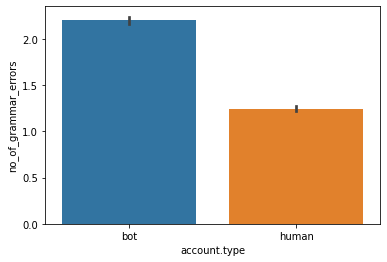

In [34]:
sns.barplot(data=tweets, x="account.type", y="no_of_grammar_errors")

<AxesSubplot:xlabel='account.type', ylabel='no_of_grammar_errors'>

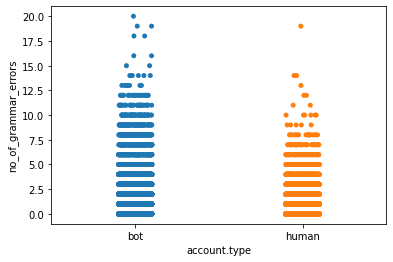

In [35]:
sns.stripplot(data=tweets, x="account.type", y="no_of_grammar_errors")

Mentions

<AxesSubplot:xlabel='account.type', ylabel='mentions_count'>

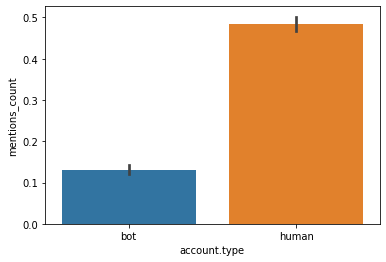

In [36]:
sns.barplot(data=tweets, x="account.type", y="mentions_count")

<AxesSubplot:xlabel='account.type', ylabel='mentions_count'>

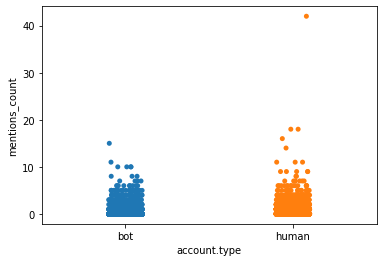

In [37]:
sns.stripplot(data=tweets, x="account.type", y="mentions_count")

Hashtags

<AxesSubplot:xlabel='account.type', ylabel='hashtags_count'>

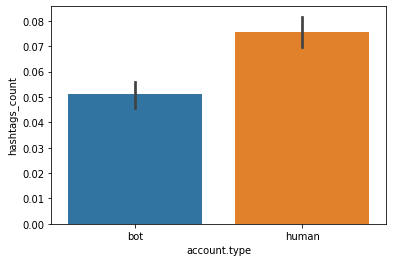

In [38]:
sns.barplot(data=tweets, x="account.type", y="hashtags_count")

<AxesSubplot:xlabel='account.type', ylabel='hashtags_count'>

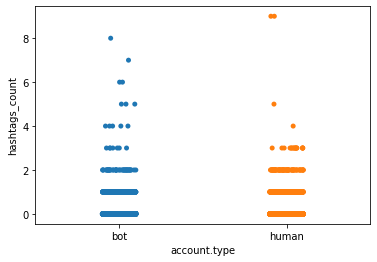

In [39]:
sns.stripplot(data=tweets, x="account.type", y="hashtags_count")

Emojis

<AxesSubplot:xlabel='account.type', ylabel='num_emojis'>

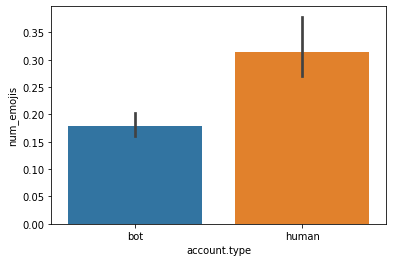

In [41]:
sns.barplot(data=tweets, x="account.type", y="num_emojis")

<AxesSubplot:xlabel='account.type', ylabel='num_emojis'>

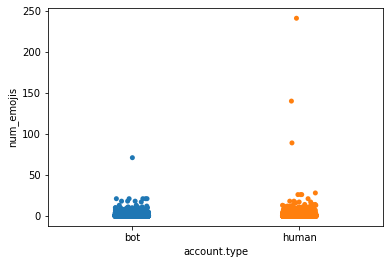

In [42]:
sns.stripplot(data=tweets, x="account.type", y="num_emojis")

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/1922073685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_tweets['no_of_grammar_errors'] = human_tweets['no_of_grammar_errors'].apply(int)
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/1922073685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_tweets['num_emojis'] = human_tweets['num_emojis'].apply(int)


<AxesSubplot:>

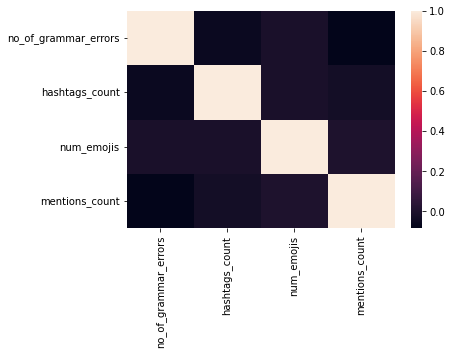

In [45]:
human_tweets['no_of_grammar_errors'] = human_tweets['no_of_grammar_errors'].apply(int)
human_tweets['num_emojis'] = human_tweets['num_emojis'].apply(int)
relevant_values_human = human_tweets[['no_of_grammar_errors','hashtags_count','num_emojis','mentions_count']]
sns.heatmap(relevant_values_human.corr())

/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/3896699431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_tweets['no_of_grammar_errors'] = bot_tweets['no_of_grammar_errors'].apply(int)
/var/folders/cw/msb46c3s00b97g2_cw34t0100000gn/T/ipykernel_1594/3896699431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_tweets['num_emojis'] = bot_tweets['num_emojis'].apply(int)


<AxesSubplot:>

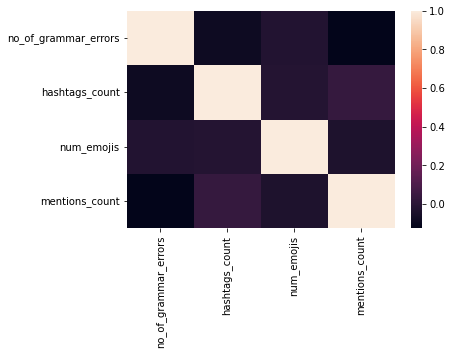

In [47]:
bot_tweets['no_of_grammar_errors'] = bot_tweets['no_of_grammar_errors'].apply(int)
bot_tweets['num_emojis'] = bot_tweets['num_emojis'].apply(int)
relevant_values_bot = bot_tweets[['no_of_grammar_errors','hashtags_count','num_emojis','mentions_count']]
sns.heatmap(relevant_values_bot.corr())

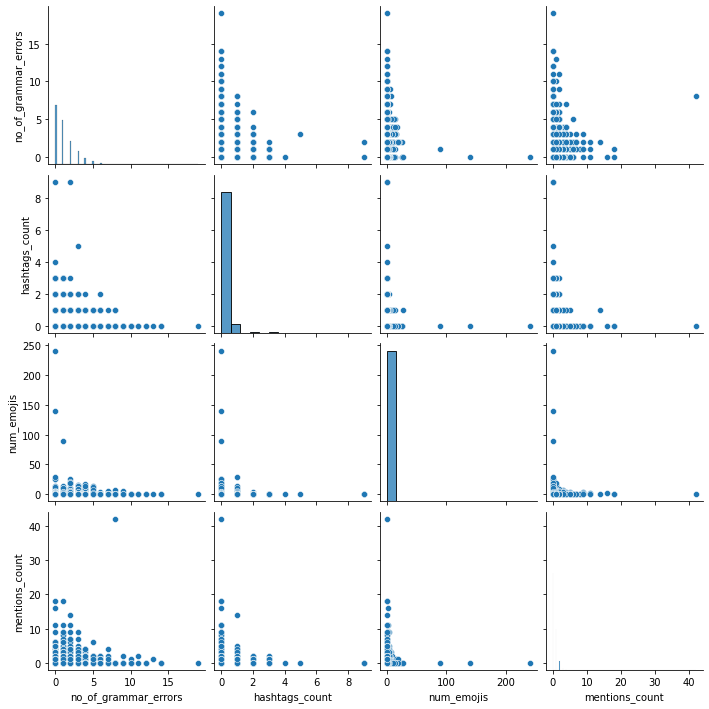

In [48]:
sns.pairplot(relevant_values_human) 

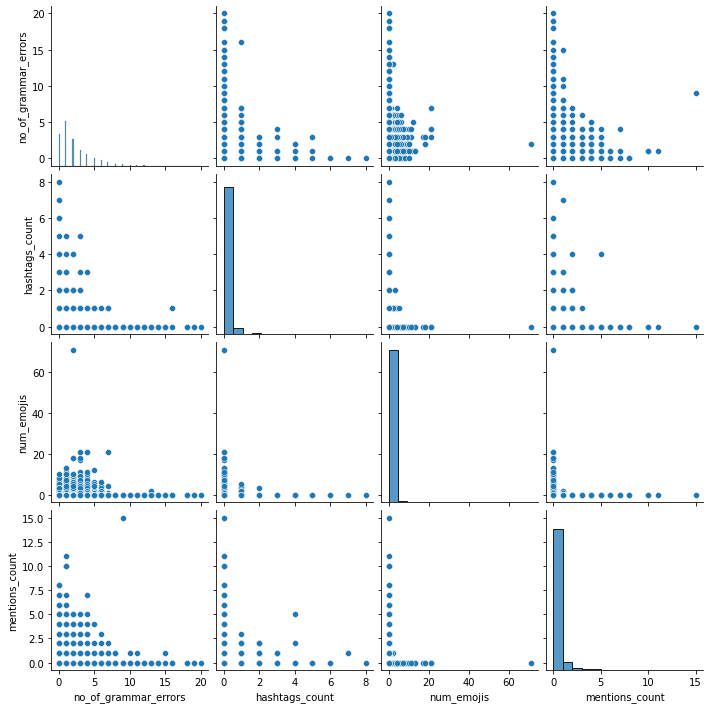

In [49]:
sns.pairplot(relevant_values_bot)

In [6]:
# import textblob
# from textblob import Word

# tweets['incorrect_spell_count'] = ''
# tweets['incorrect_spell_words'] = ''
# for word in range(len(tweets)):
#     cap = tweets["text"][word]
#     word_list = cap.split(' ')
#     incorrect_words = []
#     for i in word_list:
#         if Word(i).spellcheck()[0][1] < 1.0:
#             incorrect_words.append(i)
#     # new_caption = " ".join(correct_words)
#     # captions["clean_captions"][word] = new_caption
#     tweets['incorrect_spell_words'][word] = incorrect_words
#     tweets['incorrect_spell_count'][word] = len(incorrect_words)